In [ ]:
import numpy as np
import pandas as pd

from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv(f'PATH/thesis_exp_tables.csv')

In [ ]:
normalizer_mask=(data["selectionMethod"]=='rfe_DecisionTree')

In [ ]:
df10=data.loc[(data["featureNumber"]==10) & normalizer_mask,:].groupby(by=['Normalizer','modelName']).agg(TOTAL=("test_roc_auc","mean")).reset_index()
df10['TOTAL']=df10['TOTAL'].apply(lambda x: round(x*100, 2))
df10=df10.pivot(index='modelName', columns='Normalizer', values='TOTAL')
df10.reset_index(inplace=True)
df10.columns=["model","BN10","MA10","MM10","NZ10","SS10","NO10","UF10"]


df15=data.loc[(data["featureNumber"]==15) & normalizer_mask,:].groupby(by=['Normalizer','modelName']).agg(TOTAL=("test_roc_auc","mean")).reset_index()
df15['TOTAL']=df15['TOTAL'].apply(lambda x: round(x*100, 2))
df15=df15.pivot(index='modelName', columns='Normalizer', values='TOTAL')
df15.reset_index(inplace=True)
df15.columns=["model","BN15","MA15","MM15","NZ15","SS15","NO15","UF15"]


df20=data.loc[(data["featureNumber"]==20) & normalizer_mask,:].groupby(by=['Normalizer','modelName']).agg(TOTAL=("test_roc_auc","mean")).reset_index()
df20['TOTAL']=df20['TOTAL'].apply(lambda x: round(x*100, 2))
df20=df20.pivot(index='modelName', columns='Normalizer', values='TOTAL')
df20.reset_index(inplace=True)
df20.columns=["model","BN20","MA20","MM20","NZ20","SS20","NO20","UF20"]


df25=data.loc[(data["featureNumber"]==25) & normalizer_mask,:].groupby(by=['Normalizer','modelName']).agg(TOTAL=("test_roc_auc","mean")).reset_index()
df25['TOTAL']=df25['TOTAL'].apply(lambda x: round(x*100, 2))
df25=df25.pivot(index='modelName', columns='Normalizer', values='TOTAL')
df25.reset_index(inplace=True)
df25.columns=["model","BN25","MA25","MM25","NZ25","SS25","NO25","UF25"]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['model'],how='outer'), [df10,df15,df20,df25])

In [ ]:
df15.mean()

<ipython-input-7-9b23f9ef7826>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df15.mean()


BN15    84.382308
MA15    94.878462
MM15    94.536923
NZ15    98.413846
SS15    96.982308
NO15    99.067692
UF15    98.953077
dtype: float64

In [ ]:
df=df_merged[df_merged.filter(regex="{}|model".format(10)).columns].copy()
df.set_index('model',inplace=True)
df=df.reindex(['lr','gn','dt','knn3','knn5','svc_n','ab','xgb','bc_100','et_100','et_500','rf_100','rf_500'])
df.rename(columns={
      'MM{}'.format(10):'MinMaxScaler',
      'NZ{}'.format(10):'Normalizer',
      'BN{}'.format(10):'Binarizer',
      'MA{}'.format(10):'MaxAbsScaler',
      'UF{}'.format(10):'Uniform',
      'NO{}'.format(10):'Normal',
      'SS{}'.format(10):'StandardScaler',
}, inplace=True)
df.head(13)

,Binarizer,MaxAbsScaler,MinMaxScaler,Normalizer,StandardScaler,Normal,Uniform
model,,,,,,,
lr,78.94,78.45,78.45,95.29,90.06,94.68,96.33
gn,79.01,82.50,81.71,96.54,82.53,97.79,95.52
dt,78.95,97.52,97.45,97.20,97.54,97.55,97.59
knn3,66.49,96.94,93.28,96.67,98.10,98.93,98.95
knn5,70.63,97.61,95.77,97.74,98.11,99.11,99.14
svc_n,72.37,87.66,90.27,97.48,98.49,99.66,99.71
ab,80.01,99.42,99.43,99.01,99.64,99.63,99.63
xgb,78.44,99.73,99.72,99.57,99.73,99.72,99.72
bc_100,77.94,99.64,99.63,99.52,99.63,99.65,99.66


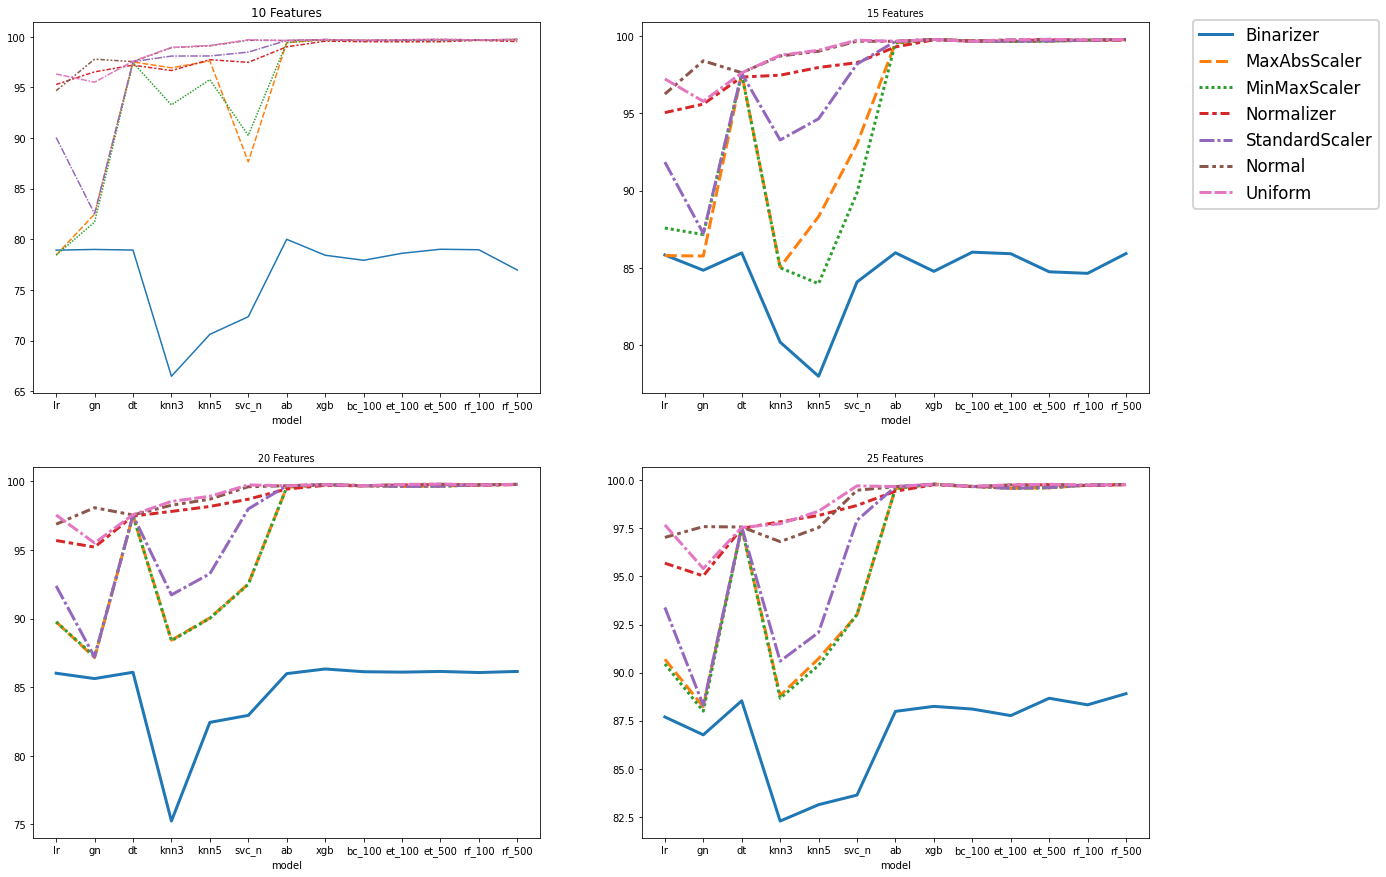

In [ ]:
fig, axs = plt.subplots(ncols=2,nrows=2, figsize=(20,15))

for index,selection_type in enumerate([10,15,20,25]):

  row_index=int(index/2)
  if index%2==0:
    column_index=0
  else:
    column_index=1

  df=df_merged[df_merged.filter(regex="{}|model".format(selection_type)).columns].copy()
  df.set_index('model',inplace=True)
  df=df.reindex(['lr','gn','dt','knn3','knn5','svc_n','ab','xgb','bc_100','et_100','et_500','rf_100','rf_500'])

  df.rename(columns={
      'MM{}'.format(selection_type):'MinMaxScaler',
      'NZ{}'.format(selection_type):'Normalizer',
      'BN{}'.format(selection_type):'Binarizer',
      'MA{}'.format(selection_type):'MaxAbsScaler',
      'UF{}'.format(selection_type):'Uniform',
      'NO{}'.format(selection_type):'Normal',
      'SS{}'.format(selection_type):'StandardScaler',
  }, inplace=True)


  df= df[['Binarizer','MaxAbsScaler','MinMaxScaler', 'Normalizer','StandardScaler', 'Normal','Uniform']]
  

  ax=sns.lineplot(
      data=df,
      markers=False, 
      dashes=True,
      ax=axs[row_index][column_index]
  )
  if row_index!=0 or column_index!=1:
    ax.get_legend().remove()
  else:
    ax.legend(loc="upper right", bbox_to_anchor=(1.47, 1.03),fontsize='xx-large')

  ax.set_title("{} Features".format(selection_type))
  ax.set_xticks(range(len(df)))
  ax.set_xticklabels(df.index)
  sns.set_context("poster",font_scale=0.4)


plt.show()

In [ ]:
df10=data.loc[(data["featureNumber"]==25) & (data["selectionMethod"]=='rfe_DecisionTree'),:].groupby(by=['Normalizer','modelName']).agg(TOTAL=("test_roc_auc","mean")).reset_index()

df10['TOTAL']=df10['TOTAL'].apply(lambda x: round(x*100, 2))
df10=df10.pivot(index='modelName', columns='Normalizer', values='TOTAL')

df10["Normalizer"].mean()

98.52153846153848

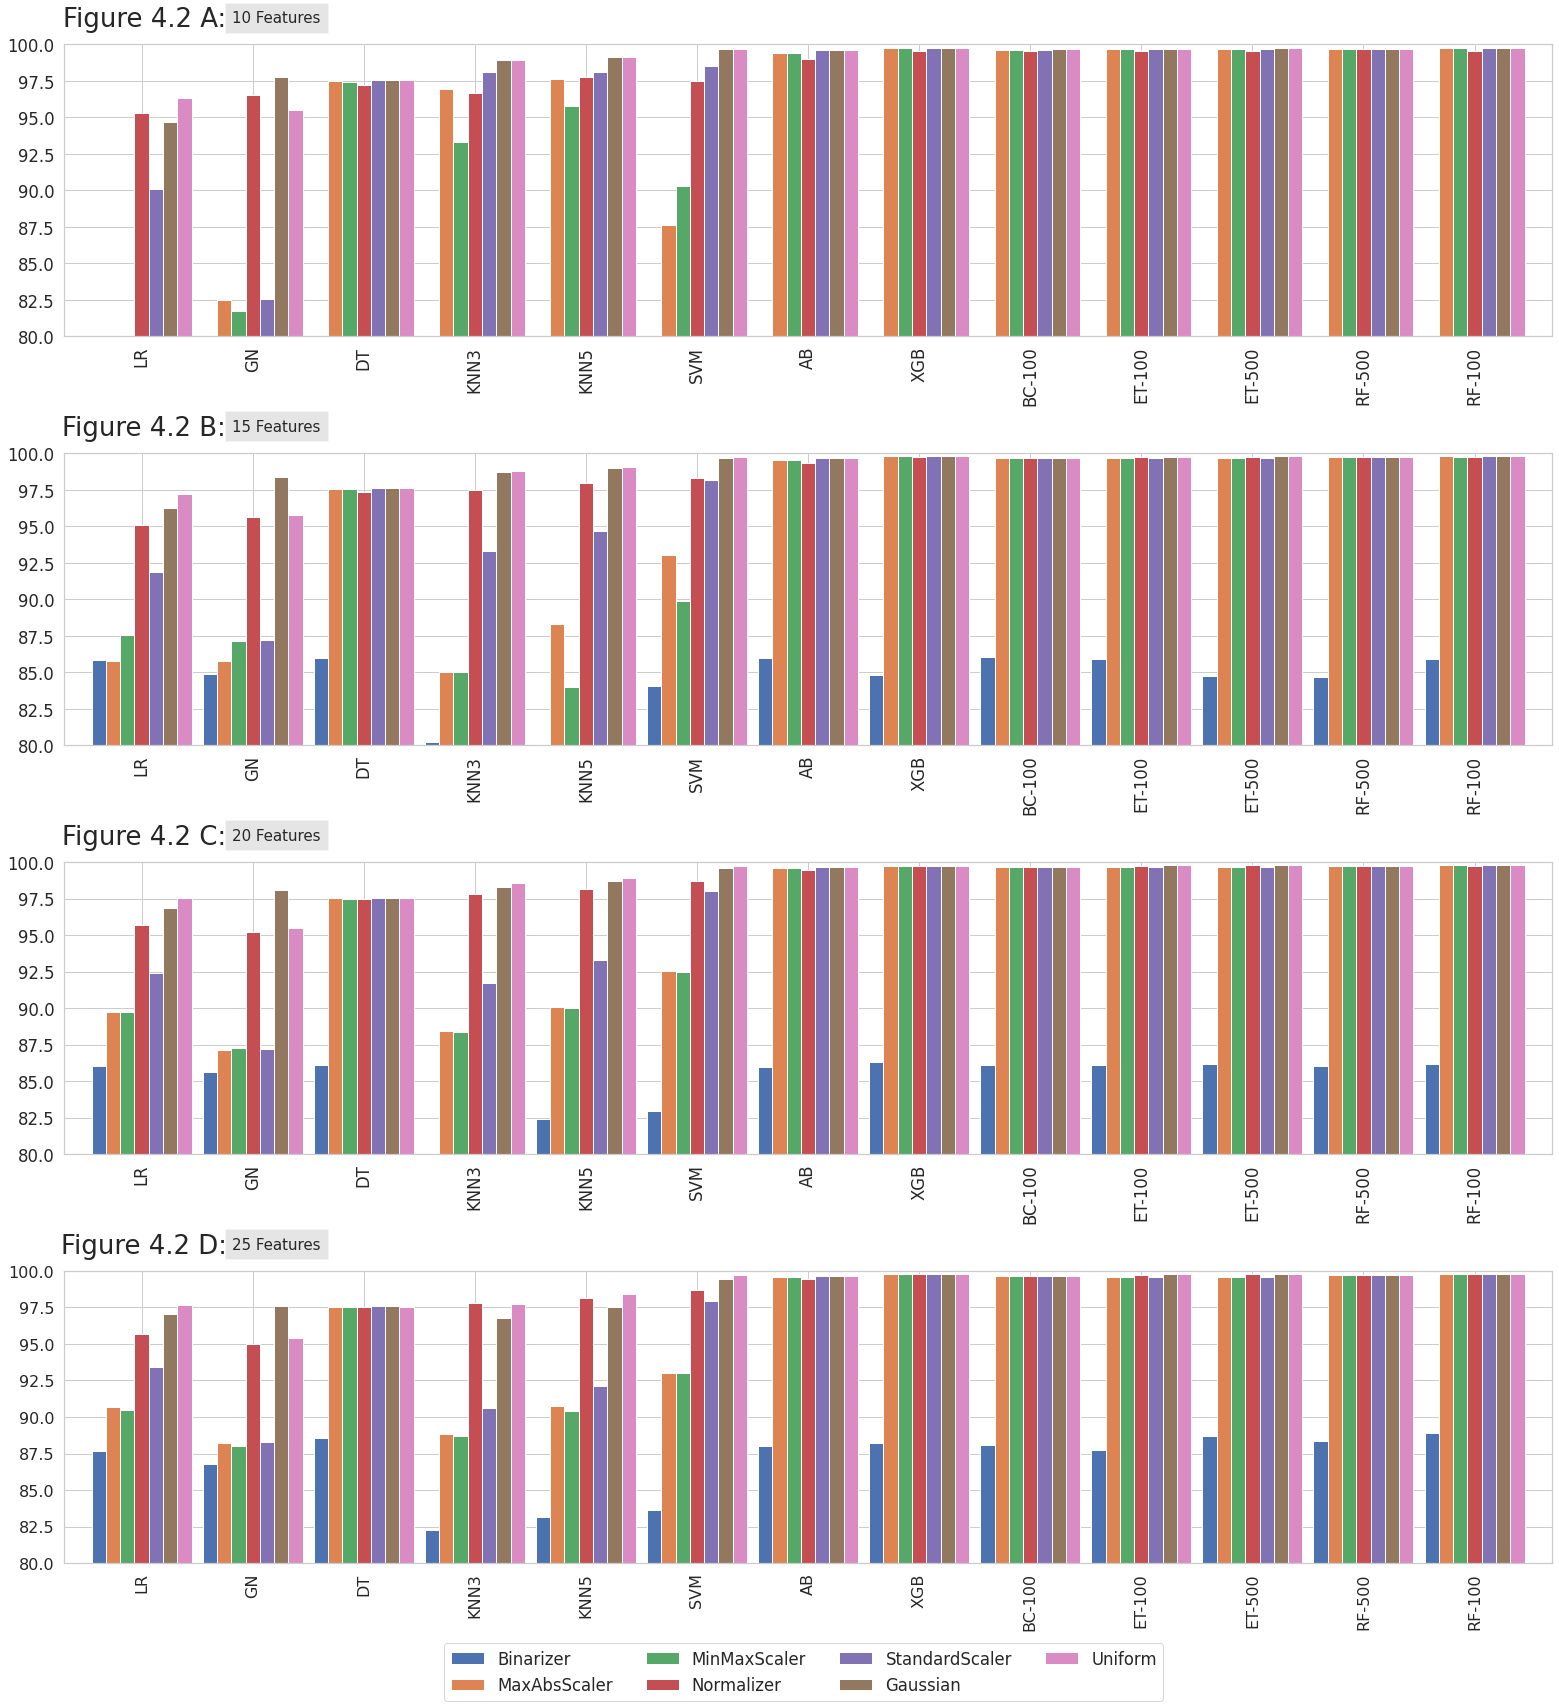

In [ ]:
fig, axs = plt.subplots(ncols=1,nrows=4, figsize=(22,24))

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

y_label=["A","B","C","D"]

for index,selection_type in enumerate([10,15,20,25]):


  df=df_merged[df_merged.filter(regex="{}|model".format(selection_type)).columns].copy()
  df.set_index('model',inplace=True)
  df=df.reindex(['lr','gn','dt','knn3','knn5','svc_n','ab','xgb','bc_100','et_100','et_500','rf_100','rf_500'])

  df.rename(index={'lr':'LR','gn':'GN','dt':'DT','knn3':'KNN3','knn5':'KNN5','svc_n':'SVM','ab':'AB','xgb':'XGB','bc_100':'BC-100','et_100':'ET-100','et_500':'ET-500','rf_500':'RF-100','rf_100':'RF-500'},inplace=True)


  df.rename(columns={
      'MM{}'.format(selection_type):'MinMaxScaler',
      'NZ{}'.format(selection_type):'Normalizer',
      'BN{}'.format(selection_type):'Binarizer',
      'MA{}'.format(selection_type):'MaxAbsScaler',
      'UF{}'.format(selection_type):'Uniform',
      'NO{}'.format(selection_type):'Gaussian',
      'SS{}'.format(selection_type):'StandardScaler',
  }, inplace=True)



  df= df[['Binarizer','MaxAbsScaler','MinMaxScaler', 'Normalizer','StandardScaler', 'Gaussian','Uniform']]
  
  sns.set(style="whitegrid",font_scale = 1.5)

  ax=df.plot(kind="bar",ax=axs[index],width=0.9)


  ax.set_ylim([80, 100])
  ax.set_xlabel('')

  # ax.set_xlabel(y_label[index],rotation=0,labelpad=0,fontsize=26)
  # ax.xaxis.set_label_coords(0.5,-0.2)
  ax.set_xlabel(f'Figure 4.2 {y_label[index]}:',rotation=0,labelpad=0,fontsize=26)
  ax.xaxis.set_label_coords(0.054,1.13)


  if index!=3:
    ax.get_legend().remove()
  else:
    # ax.legend(loc="upper right", bbox_to_anchor=(1.07, 1.025))
    ax.legend(loc="lower left", ncol=4,bbox_to_anchor=(0.25, -0.5))

 

  # ax.set_title("{} Algorithm".format(algorithm_dic[selection_type]))
  ax.set_title("{} Features".format(
      selection_type), 
      pad=0.5,
      y=1.09,
      x=0.113,
      fontsize=15, 
      loc='left',
      va="center",
      bbox=dict(facecolor='gray',alpha=0.2,boxstyle='square,pad=0.5')
  )


  ax.set_xticks(range(len(df)))
  ax.set_xticklabels(df.index)



fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.4)
plt.show()